<a href="https://colab.research.google.com/github/CrodriguezCode/TalentoTech/blob/main/Proyecto_Clasificacion_Fumadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Clasificacion de Fumadores Segun Señales Corporales**
**Carlos A. Rodriguez Prado**

***Tutoria: Ph.D. Andrés Felipe Escallón Portilla***

Inteligencia Artificial Nivel Explorador - Corte 5

TalentoTech

En el siguiente video se ve un resumen del proyecto:

https://youtu.be/RENZINNUp5o


###DESCRIPCION DEL PROYECTO




Este proyecto busca clasificar si una persona es fumadora o no partiendo de los informacion de signos coporales, esta clasificacion se realizara mediante técnicas avanzadas de aprendizaje automático para clasificacion (SVMs y Regresion logistica).

Para el desarrollo de este proyecto emplean librerias y funciones que se iran describiendo a lo largo del desarrollo del codigo. La base de datos a utilizarse fue tomada de la plataforma Kaggle (https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking), la cual cuenta con 55692 datos y 27 atributos.

En primera instancia se realizó una verificacion, visualizacion y tratamiento de los datos (codificacion de variables categoricas).

Posteriormente se realizan 4 pruebas distintas utilizando en cada una los dos algoritmos de clasificacion. En cada prueba se realiza un tratamiento de los datos como: Eliminacion de atributos muy correlacionados, balanceo de datos en atributo clase fumadora y separacion de datos deacuerdo al genero (hombre y mujer).

Para visualizar los indices de rendimiento en cada una de las pruebas y con cada algorimo se realiza una matriz de confusion, adicional se extrae un reporte de clasificacion.

Por ultimo se realiza una comparacion entre los algoritmos utilizados y las distintas pruebas.

### Variables:


1. ID : index [ID: índice]
2. gender [género]
3. age : 5-years gap [edad: diferencia de 5 años]
4. height(cm) [altura (cm)]
5. weight(kg) [peso (kg)]
6. waist(cm) : Waist circumference length [cintura (cm): longitud de la circunferencia de la cintura]
7. eyesight(left) [vista (izquierda)]
8. eyesight(right) [vista (derecha)]
9. hearing(left) [audición (izquierda)]
10. hearing(right) [audición (derecha)]
11. systolic : Blood pressure [sistólica: presión arterial]
12. relaxation : Blood pressure [distolica: presión arterial]
13. fasting blood sugar [azúcar en sangre en ayunas]
14. Cholesterol : total [colesterol: total]
15. triglyceride [triglicéridos]
16. HDL : cholesterol type [HDL: tipo de colesterol]
17. LDL : cholesterol type [LDL: tipo de colesterol]
18. hemoglobin [hemoglobina]
19. Urine protein [proteína en orina]
20. serum creatinine [creatinina sérica]
21. AST : glutamic oxaloacetic transaminase type [AST: tipo de transaminasa glutámico-oxalacética]
22. ALT : glutamic oxaloacetic transaminase type [ALT: tipo de transaminasa glutámico-oxalacética]
23. Gtp : γ-GTP []
24. oral : Oral Examination status [oral: estado del examen oral]
25. dental caries [caries dental]
26. tartar : tartar status [sarro: estado del sarro]
27. smoking [tabaquismo]

***Importacion de librerias - Configuracion inicial***

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [82]:
# Desactivar las alertas
warnings.filterwarnings('ignore')

In [83]:
# Mostar todas las columnas de los DataFrame
pd.set_option('display.max_columns', None)

***Importacion de Datos y visualizacion***

In [84]:
# Importancion de datos
smoking = pd.read_csv("smoking.csv")
smoking = smoking.drop(columns=['ID'])# eliminacion de la columna ID, no es utilizada para el analisis
smoking.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


***Analisis exploratorio de los datos***

In [85]:
#Visualizacion del info del dataframe
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [86]:
# Visualizar datos en blanco del DataFrame
datos_blanco = pd.DataFrame({
'Registros en Blanco' : smoking.isna().sum(),
'% Registros en Blanco' : 100*smoking.isna().sum()/len(smoking)
})
datos_blanco

,Registros en Blanco,% Registros en Blanco
gender,0,0.0
age,0,0.0
height(cm),0,0.0
weight(kg),0,0.0
waist(cm),0,0.0
eyesight(left),0,0.0
eyesight(right),0,0.0
hearing(left),0,0.0
hearing(right),0,0.0
systolic,0,0.0


In [87]:
#Visualizar los valores de las variables categoricas del DataFrame
var_cat_smoking = smoking[['gender','hearing(left)','hearing(right)','Urine protein', 'oral', 'dental caries', 'tartar','smoking']]
unique_counts_smoking = var_cat_smoking.nunique()
unique_values_smoking = var_cat_smoking.apply(lambda x: x.unique())
pd.DataFrame({'Frequencia': unique_counts_smoking, 'Valores Unicos': unique_values_smoking})

,Frequency,Unique Values
gender,2,"[F, M]"
hearing(left),2,"[1.0, 2.0]"
hearing(right),2,"[1.0, 2.0]"
Urine protein,6,"[1.0, 3.0, 2.0, 4.0, 5.0, 6.0]"
oral,1,[Y]
dental caries,2,"[0, 1]"
tartar,2,"[Y, N]"
smoking,2,"[0, 1]"


In [88]:
#visualizacion de las variables numericas
var_num_smoking = smoking.drop(var_cat_smoking.columns, axis=1)
var_num_smoking.describe().T.round(1)


,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.2,12.1,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.6,9.2,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.9,12.8,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.0,9.3,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.0,0.5,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.0,0.5,0.1,0.8,1.0,1.2,9.9
systolic,55692.0,121.5,13.7,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.0,9.7,40.0,70.0,76.0,82.0,146.0
fasting blood sugar,55692.0,99.3,20.8,46.0,89.0,96.0,104.0,505.0
Cholesterol,55692.0,196.9,36.3,55.0,172.0,195.0,220.0,445.0


**COMENTARIOS SOBRE TIPOS DE DATOS:**

En el dataset no se encuentran registros vacíos.

El dataset posee las siguientes variables categóricas:
*gender,
hearing(left),
hearing(right),
Urine protein,
oral,
dental caries,
tartar,smoking.*


El dataset poseen las siguientes variables numericas:
*height(cm),
weight(kg),
waist(cm),
eyesig ht(lett),
eyesight(right),
systolic,
relaxation,
fasting sugar,
Cholesterol,
triglyceride,
HDL,
LDL,
hemoglobin,
serum creatinine,
AST,
ALT,
Gtp*

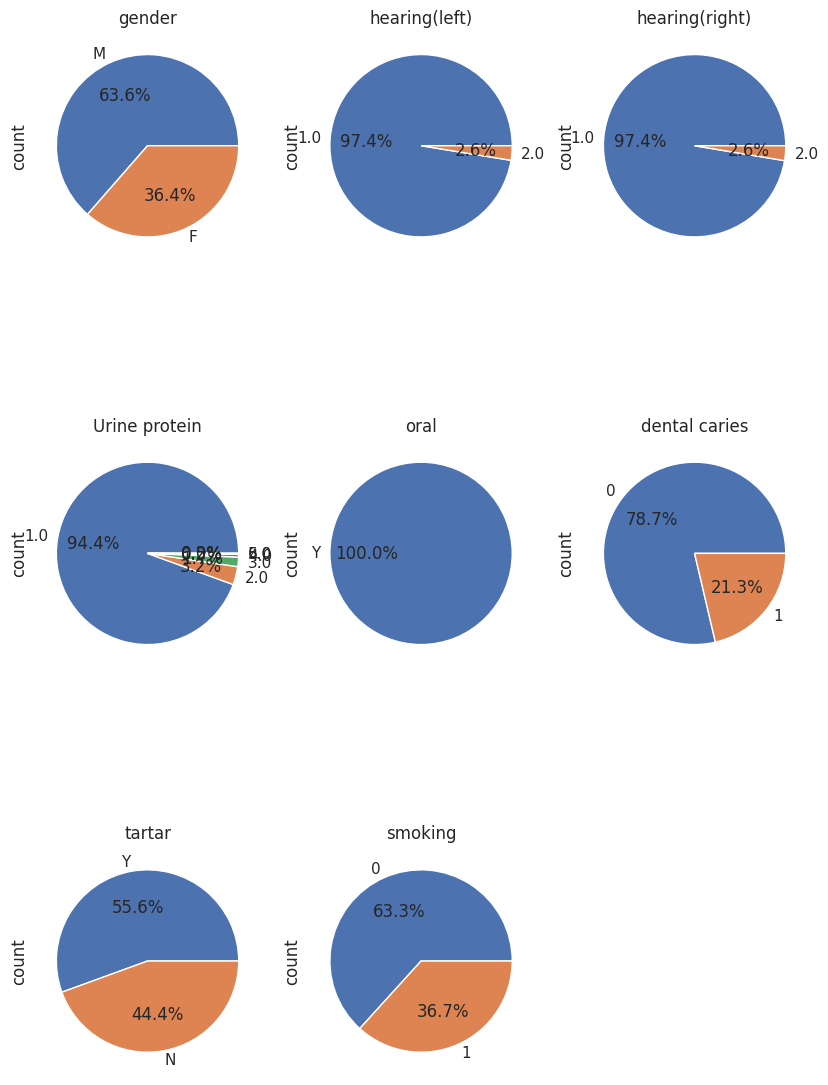

In [89]:
# Visualizar la distibucion de los datos de las variables categoricas
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']

plt.figure(figsize=(10,15))
sns.set_style('darkgrid')
i = 1

for column in var_cat_smoking:
    plt.subplot(3,3,i)
    plt.title(f'{column}')
    smoking[column].value_counts().plot.pie(autopct="%1.1f%%");
    i += 1



(0.0, 1.0, 0.0, 1.0)

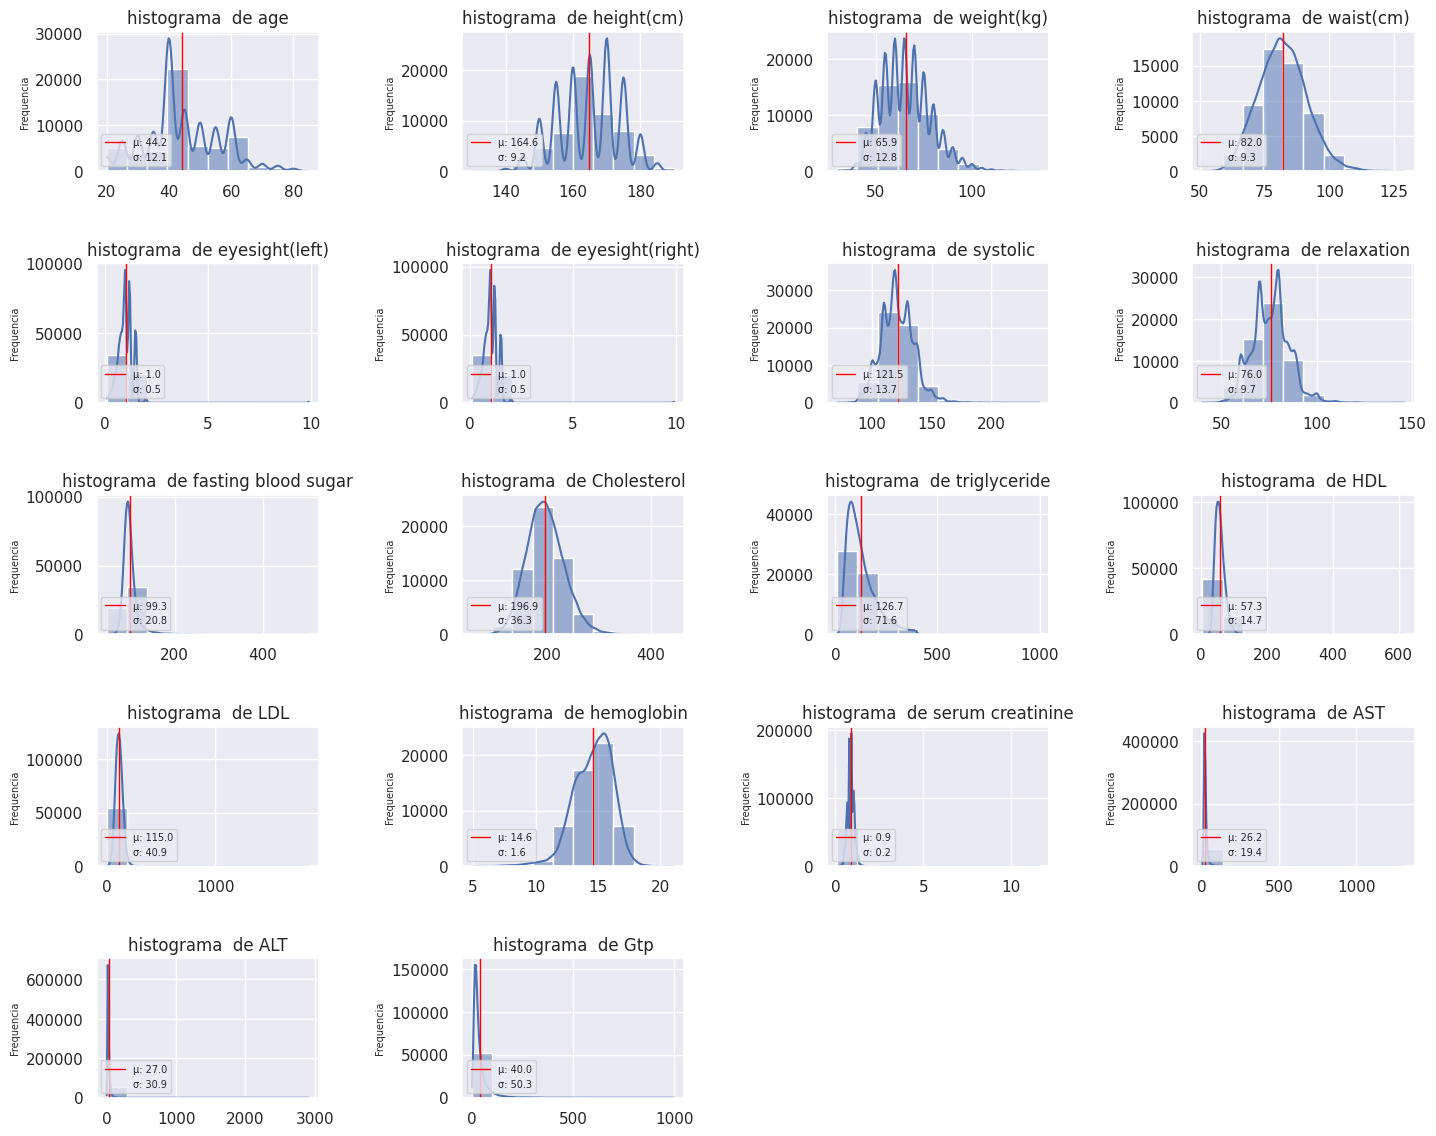

In [90]:
# Visualizar la distibucion de los datos de las variables numericas

columns = var_num_smoking.columns.tolist()

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))

for i, variable in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.histplot(var_num_smoking[variable], bins=10, edgecolor = None, kde=True, ax = axes[row, col])
    mean_value = var_num_smoking[variable].mean()
    std_dev = var_num_smoking[variable].std()
    axes[row, col].axvline(mean_value, color='red', linewidth=1, label= f'μ: {mean_value:.1f}') # Media
    axes[row, col].axvline(mean_value + std_dev, color='yellow', alpha = 0.0, linewidth=1, label= f'σ: {std_dev:.1f}') # Desviacion estandar
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequencia', fontsize = 7)
    axes[row, col].set_title(f'histograma  de {variable}')
    axes[row, col].legend(loc = 3, fontsize = 7)

plt.tight_layout(pad=2.5)
axes[4, 2].axis('off')
axes[4, 3].axis('off')

**TRATAMIENTO DE DATOS**

In [91]:
#Codificando las variables objeto

le = LabelEncoder()
smoking['gender_encoded'] = le.fit_transform(smoking['gender'])
smoking['oral_encoded'] = le.fit_transform(smoking['oral'])
smoking['tartar_encoded'] = le.fit_transform(smoking['tartar'])
smoking.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,gender_encoded,oral_encoded,tartar_encoded
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0,0,0,1
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0,0,0,1
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1,1,0,0
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0,1,0,1
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0,0,0,0


***Borrando columnas objeto y columnas que no se tendran en cuenta***

Se decide no tomar las siguiente columnas

*ID:* no es un atributo relevante para el analisis

*oral:* es un atributo que no presenta informacion para analisis, porque el 100% de la muestra presenta un valor de **Y**


In [92]:
# Borrando columnas objeto y columnas que no se van a necesitar
smoking = smoking.drop(columns=['gender', 'oral', 'tartar','oral_encoded'])
smoking.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_encoded,tartar_encoded
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0,1
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,1
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1,1,0
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,1
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0


***CORRELACION ENTRE VARIABLES***

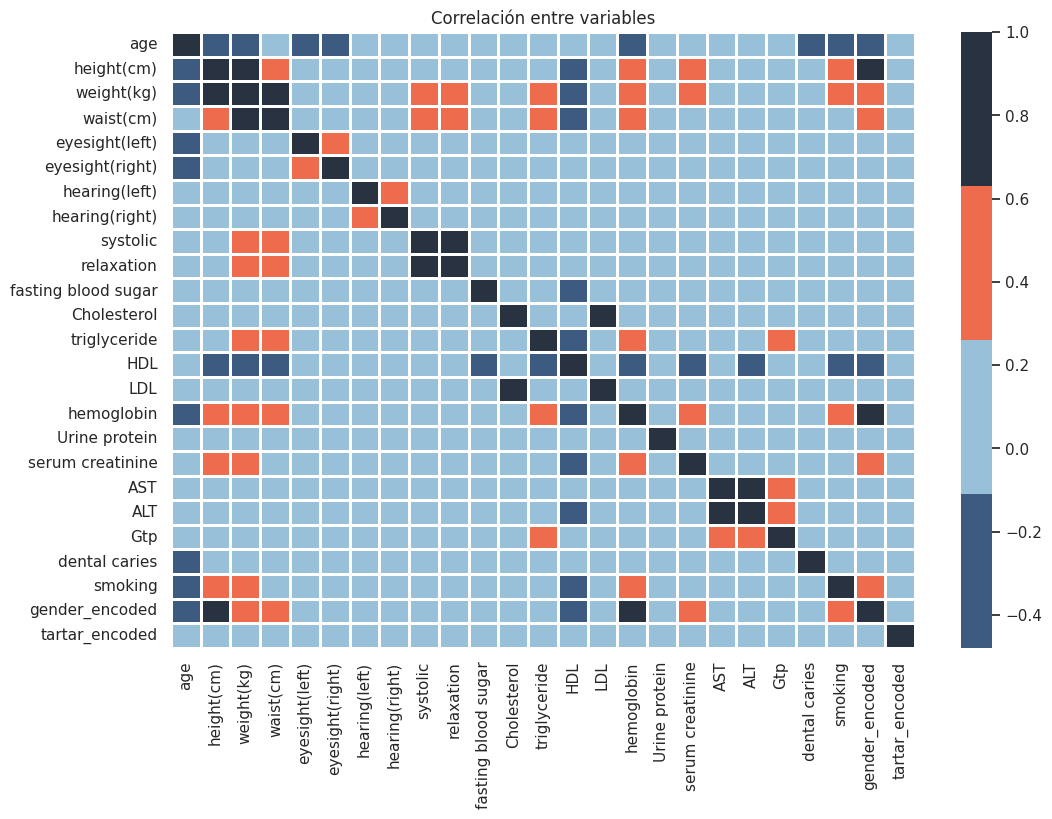

In [93]:
# revisando la correlación entre las variables
plt.figure(figsize=(12,8))
sns.heatmap(smoking.corr(), annot=None, cmap=svm_palette, linewidths = 2) # calcular correlación y graficar como mapa de calor
plt.title('Correlación entre variables')
plt.show()

# ***PRUEBA 1***


In [94]:
#En la etapa de preparación de los datos crearemos una partición para tener
#un conjunto de datos de entrenamiento y un conjunto de datos de validación.

X = smoking.drop(columns=['smoking']) # X todo el dataset menos la columna smoking (caracteristicas)
y = smoking['smoking'] # y seran la columna smoking

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101) # se deja 20% de datos para test

print(f'Número total de muestras en el dataset: {len(X)}')
print("*****"*10)
print(f'Muestras para entrenamiento: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Muestras para validación: {len(X_test)}')
print(f'Tamaño de X_test: {X_test.shape}')

Número total de muestras en el dataset: 55692
**************************************************
Muestras para entrenamiento: 44553
Tamaño de X_train: (44553, 24)
**************************************************
Muestras para validación: 11139
Tamaño de X_test: (11139, 24)


In [95]:
# Ajuste de los datos para que tengan media cero y varianza uno.
#Es decir, alteramos linealmente los datos para que estén escalados entre -1 y 1 de tal
#forma que el entrenamiento de los modelos sea más rápido y mas estable numéricamente.
#Con esto se evitan problemas de explosión de gradientes.
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Prueba 1: Clasificacion mediante SVMs

In [96]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
print(f'Puntuacion de entrenamiento del modelo: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Puntuacion de prueba del modelo entrenado: {test_score*100}')

Puntuacion de entrenamiento del modelo: 78.70850447781295
Puntuacion de prueba del modelo entrenado: 75.95834455516653


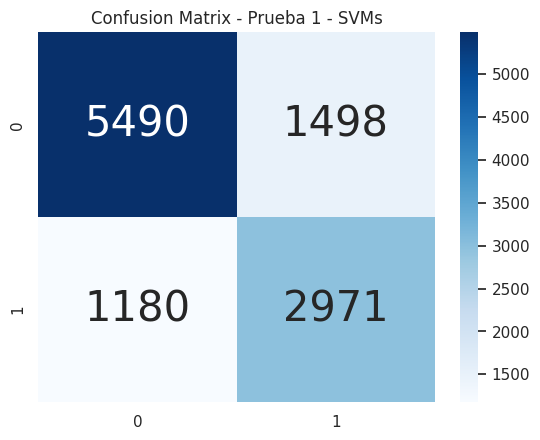

In [97]:
# Midiendo el desempeño de la clasificacion mediante matriz de confusion

cm_SVMs = confusion_matrix(y_test, pred)
ax = plt.axes()
sns.heatmap(cm_SVMs, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 1 - SVMs')
plt.show()

In [98]:
# reporte de rendimiento del la clasificacion mediante SVMs en la primera prueba
p1_svms=classification_report(y_test, pred, output_dict=True)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      6988
           1       0.66      0.72      0.69      4151

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.75     11139
weighted avg       0.76      0.76      0.76     11139



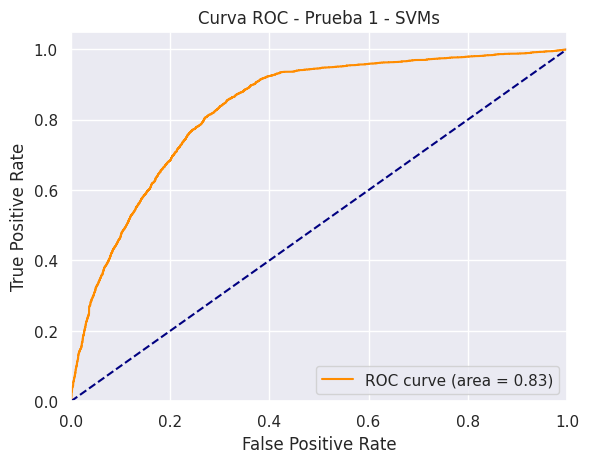

In [99]:
# Curva ROC Prueba 1 - SVMs

y_score = model.decision_function(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 1 - SVMs')
plt.legend(loc="lower right")
plt.show()

### PRUEBA 1: Clasificacion mediante Regresión Logística

In [100]:
# Ajustando el modelo
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression()

In [101]:
# predicioendo los resultados
y_pred = classifier.predict(X_test)
probs_y = classifier.predict_proba(X_test) # mirando las probabilidades de las predicciones


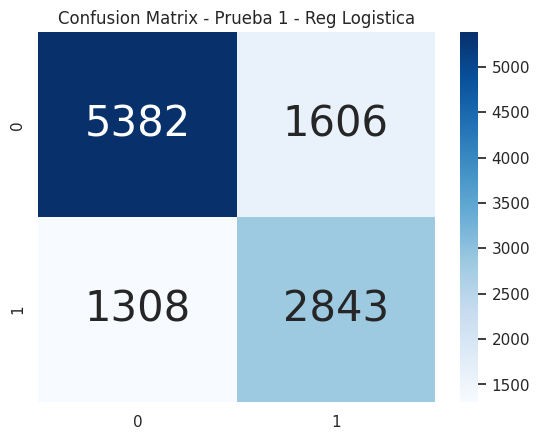

In [102]:
# Evaluando matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 1 - Reg Logistica')
plt.show()

In [103]:
# reporte de rendimiento del la clasificacion mediante Regresion logistica en la primera prueba
p1_reglog=classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      6988
           1       0.64      0.68      0.66      4151

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.74      0.74     11139



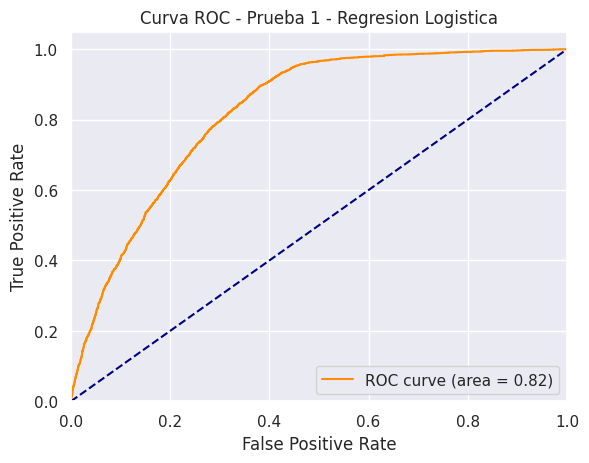

In [104]:
# Curva ROC Prueba 1 - Regresion logistica

y_score = classifier.decision_function(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 1 - Regresion Logistica')
plt.legend(loc="lower right")
plt.show()

# ***PRUEBA 2: Eliminando variables correlacionadas***

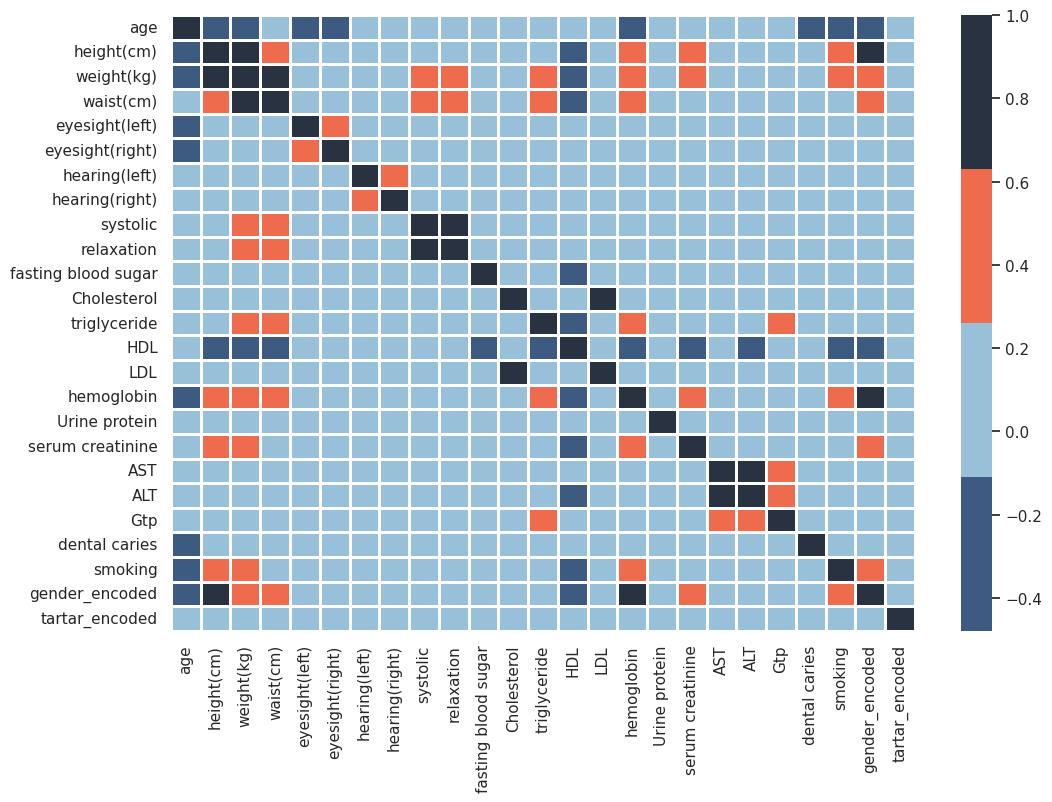

In [105]:
# revisando la correlación entre las variables
plt.figure(figsize=(12,8))
sns.heatmap(smoking.corr(), annot=None, cmap=svm_palette, linewidths = 2) # calcular correlación y graficar como mapa de calor
plt.show()

In [106]:
# Eliminando variables muy correlacionadas
smoking_end = smoking.drop(columns=['age', 'HDL', 'ALT','systolic','Cholesterol'])
#smoking_end = smoking.drop(columns=['height(cm)', 'weight(kg)','systolic','Cholesterol','gender_encoded','ALT'])

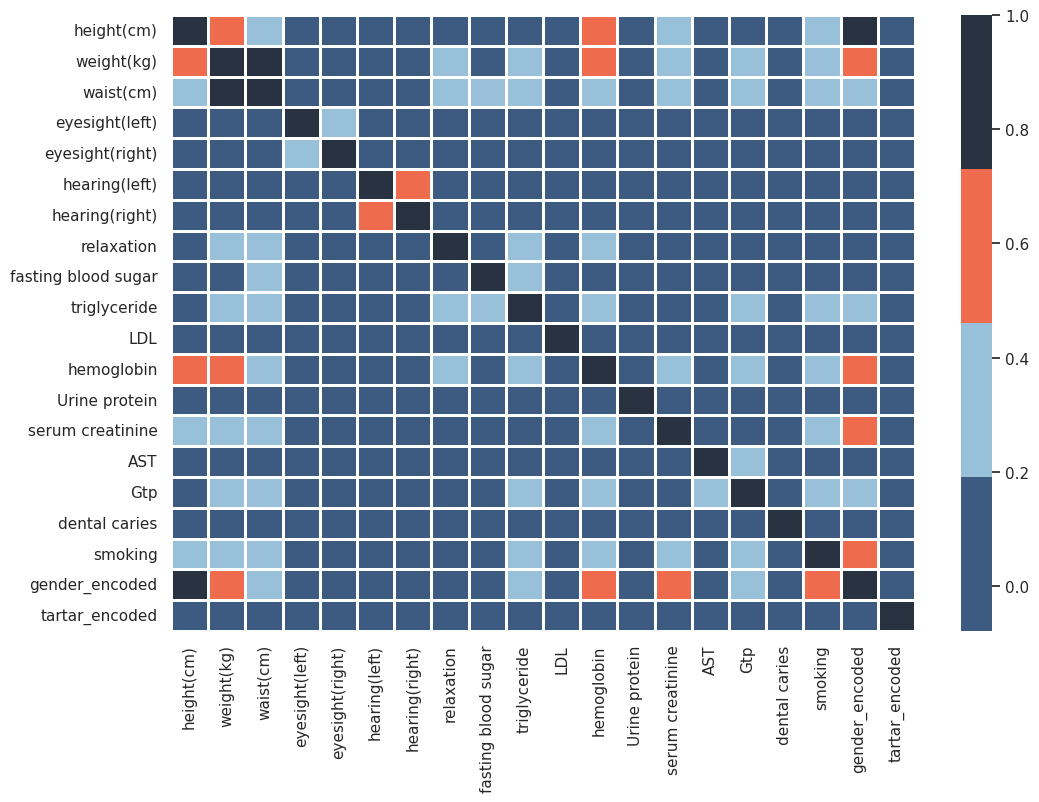

In [107]:
# revisando la correlación entre las variables
plt.figure(figsize=(12,8))
sns.heatmap(smoking_end.corr(), annot=None, cmap=svm_palette, linewidths = 2) # calcular correlación y graficar como mapa de calor
plt.show()

In [108]:
X = smoking_end.drop(columns=['smoking']) # X todo el dataset menos la columna smoking (caracteristicas)
y = smoking_end['smoking'] # y seran la columna smoking

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101) # se deja 20% de datos para test

print(f'Número total de muestras en el dataset: {len(X)}')
print("*****"*10)
print(f'Muestras para entrenamiento: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Muestras para validación: {len(X_test)}')
print(f'Tamaño de X_test: {X_test.shape}')

Número total de muestras en el dataset: 55692
**************************************************
Muestras para entrenamiento: 44553
Tamaño de X_train: (44553, 19)
**************************************************
Muestras para validación: 11139
Tamaño de X_test: (11139, 19)


In [109]:
# Ajuste de los datos para que tengan media cero y varianza uno.
#Es decir, alteramos linealmente los datos para que estén escalados entre -1 y 1 de tal
#forma que el entrenamiento de los modelos sea más rápido y mas estable numéricamente.
#Con esto se evitan problemas de explosión de gradientes.
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Prueba 2: Clasificacion mediante SVMs

In [110]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
print(f'Puntuacion de entrenamiento del modelo: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Puntuacion de prueba del modelo entrenado: {test_score*100}')

Puntuacion de entrenamiento del modelo: 77.01613808273292
Puntuacion de prueba del modelo entrenado: 75.13241763174432


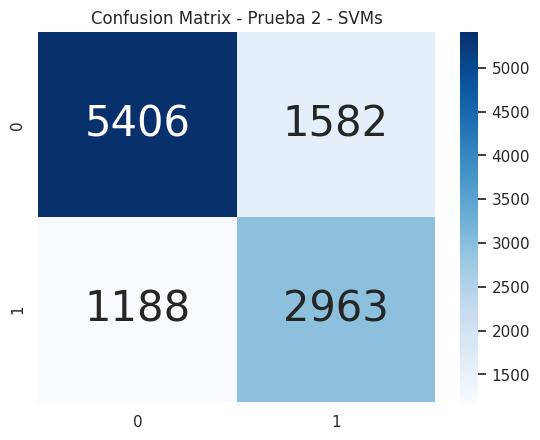

In [111]:
# Midiendo el desempeño de la clasificacion mediante matriz de confusion

cm_SVMs = confusion_matrix(y_test, pred)
ax = plt.axes()
sns.heatmap(cm_SVMs, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 2 - SVMs')
plt.show()

In [112]:
# reporte de rendimiento del la clasificacion mediante SVMs en la primera prueba
p2_svms=classification_report(y_test, pred, output_dict=True)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      6988
           1       0.65      0.71      0.68      4151

    accuracy                           0.75     11139
   macro avg       0.74      0.74      0.74     11139
weighted avg       0.76      0.75      0.75     11139



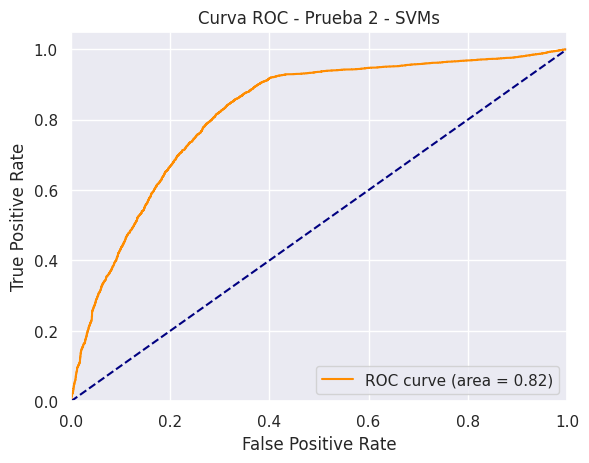

In [113]:
# Curva ROC Prueba 2 - SVMs

y_score = model.decision_function(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 2 - SVMs')
plt.legend(loc="lower right")
plt.show()

### PRUEBA 2: Clasificacion mediante Regresión Logística

In [114]:
# Ajustando el modelo
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression()

In [115]:
# prediciendo los resultados
y_pred = classifier.predict(X_test)
probs_y = classifier.predict_proba(X_test) # mirando las probabilidades de las predicciones

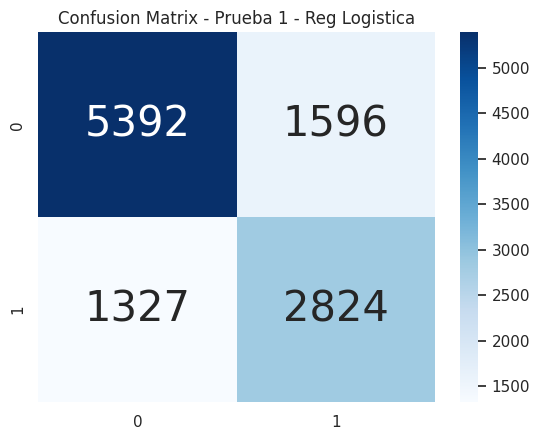

In [116]:
# Evaluando matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 1 - Reg Logistica')
plt.show()

In [117]:
# reporte de rendimiento del la clasificacion mediante Regresion logistica en la primera prueba
p2_reglog=classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      6988
           1       0.64      0.68      0.66      4151

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.74      0.74     11139



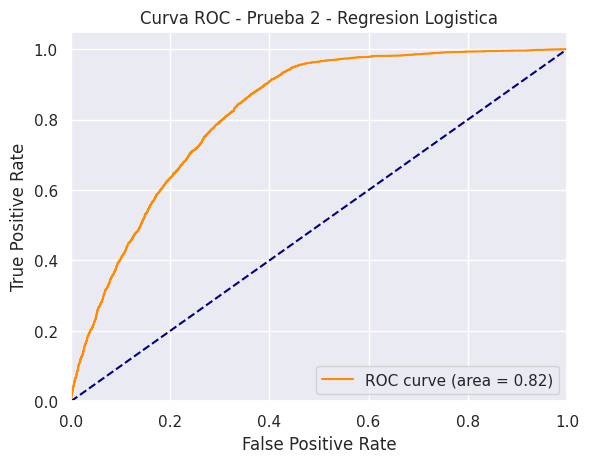

In [118]:
# Curva ROC Prueba 1 - Regresion logistica

y_score = classifier.decision_function(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 2 - Regresion Logistica')
plt.legend(loc="lower right")
plt.show()

# ***PRUEBA 3: Balanceo de clase Fumadora (Utilizando el dataset de la prueba 2 con variables correlacionadas depuradas)***

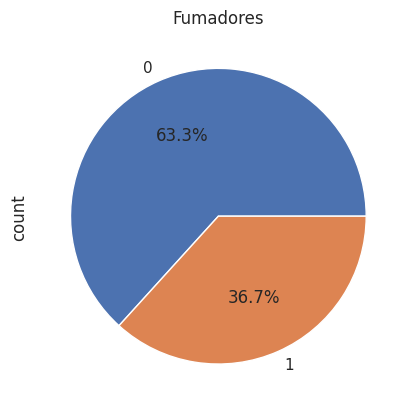

In [119]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Fumadores")
smoking_end['smoking'].value_counts().plot.pie(autopct="%1.1f%%");

In [120]:
# Balanceando clase fumadora con ayuda de Gemini mediante el siguiente promp
#tengo un dataset de varias columnas, donde una de las columnas presenta un valor
#de dos estados, deseo recortar el dataset de tal forma la columna de dos estados quede 50 / 50

# Identificamos la clase mayoritaria
class_counts = smoking_end['smoking'].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Submuestreo
df_majority = smoking_end[smoking_end['smoking'] == majority_class]
df_minority = smoking_end[smoking_end['smoking'] == minority_class]
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)
smoking_end_balanced = pd.concat([df_majority_downsampled, df_minority])# Dataset balanceado

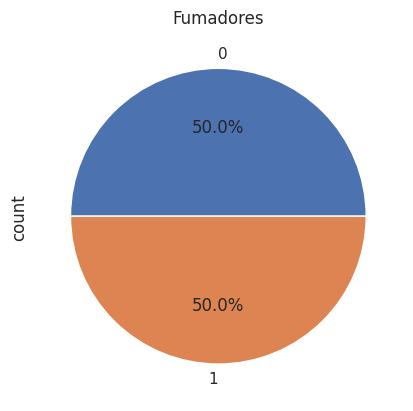

In [121]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Fumadores")
smoking_end_balanced['smoking'].value_counts().plot.pie(autopct="%1.1f%%");

In [122]:
X = smoking_end_balanced.drop(columns=['smoking']) # X todo el dataset menos la columna smoking (caracteristicas)
y = smoking_end_balanced['smoking'] # y seran la columna smoking

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

print(f'Número total de muestras en el dataset: {len(X)}')
print("*****"*10)
print(f'Muestras para entrenamiento: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Muestras para validación: {len(X_test)}')
print(f'Tamaño de X_test: {X_test.shape}')

Número total de muestras en el dataset: 40910
**************************************************
Muestras para entrenamiento: 32728
Tamaño de X_train: (32728, 19)
**************************************************
Muestras para validación: 8182
Tamaño de X_test: (8182, 19)


In [123]:
# Ajuste de los datos para que tengan media cero y varianza uno.
#Es decir, alteramos linealmente los datos para que estén escalados entre -1 y 1 de tal
#forma que el entrenamiento de los modelos sea más rápido y mas estable numéricamente.
#Con esto se evitan problemas de explosión de gradientes.
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Prueba 3: Clasificacion mediante SVMs

In [124]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 76.89745783427034
Test score of trained model: 75.67831825959423


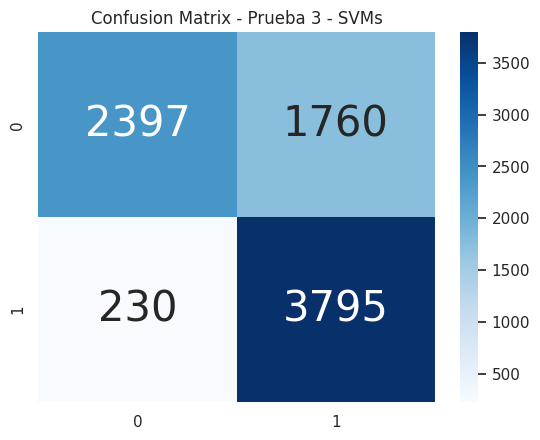

In [125]:
# Midiendo el desempeño de la clasificacion mediante matriz de confusion

cm_SVMs = confusion_matrix(y_test, pred)
ax = plt.axes()
sns.heatmap(cm_SVMs, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 3 - SVMs')
plt.show()

In [126]:
# reporte de rendimiento del la clasificacion mediante SVMs en la tercera prueba
p3_svms=classification_report(y_test, pred, output_dict=True)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      4157
           1       0.68      0.94      0.79      4025

    accuracy                           0.76      8182
   macro avg       0.80      0.76      0.75      8182
weighted avg       0.80      0.76      0.75      8182



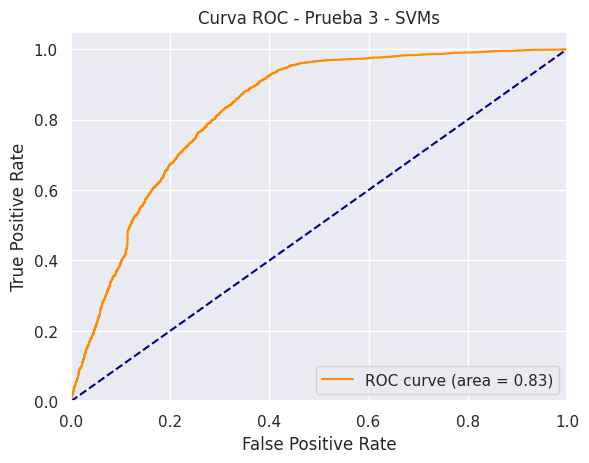

In [127]:
# Curva ROC Prueba 3 - SVMs

y_score = model.decision_function(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 3 - SVMs')
plt.legend(loc="lower right")
plt.show()

### PRUEBA 3: Clasificacion mediante Regresión Logística

In [128]:
# Ajustando el modelo
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression()

In [129]:
# predicioendo los resultados
y_pred = classifier.predict(X_test)
probs_y = classifier.predict_proba(X_test) # mirando las probabilidades de las prediccione

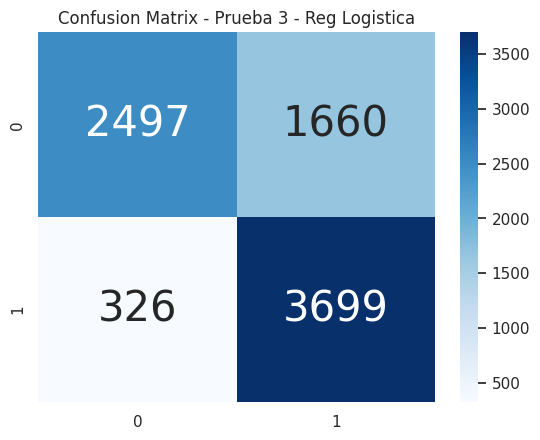

In [130]:
# Evaluando matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 3 - Reg Logistica')
plt.show()

In [131]:
# reporte de rendimiento del la clasificacion mediante Regresion logistica en la primera prueba
p3_reglog=classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.60      0.72      4157
           1       0.69      0.92      0.79      4025

    accuracy                           0.76      8182
   macro avg       0.79      0.76      0.75      8182
weighted avg       0.79      0.76      0.75      8182



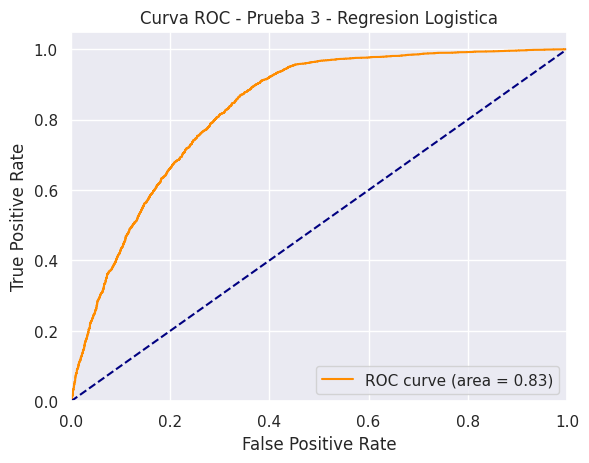

In [132]:
# Curva ROC Prueba 3 - Regresion logistica

y_score = classifier.decision_function(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 3 - Regresion Logistica')
plt.legend(loc="lower right")
plt.show()

# ***PRUEBA 4: separando entre generos (dataset variables correlacionadas depuradas) - Balanceando clase fumadora***

In [133]:
# Separando el Dataset inicial en dos, uno para cada genero
smoking_mujeres = smoking_end[smoking['gender_encoded'] == 0] # Fumadores mujeres
smoking_hombres = smoking_end[smoking['gender_encoded'] == 1] # Fumadores hombres

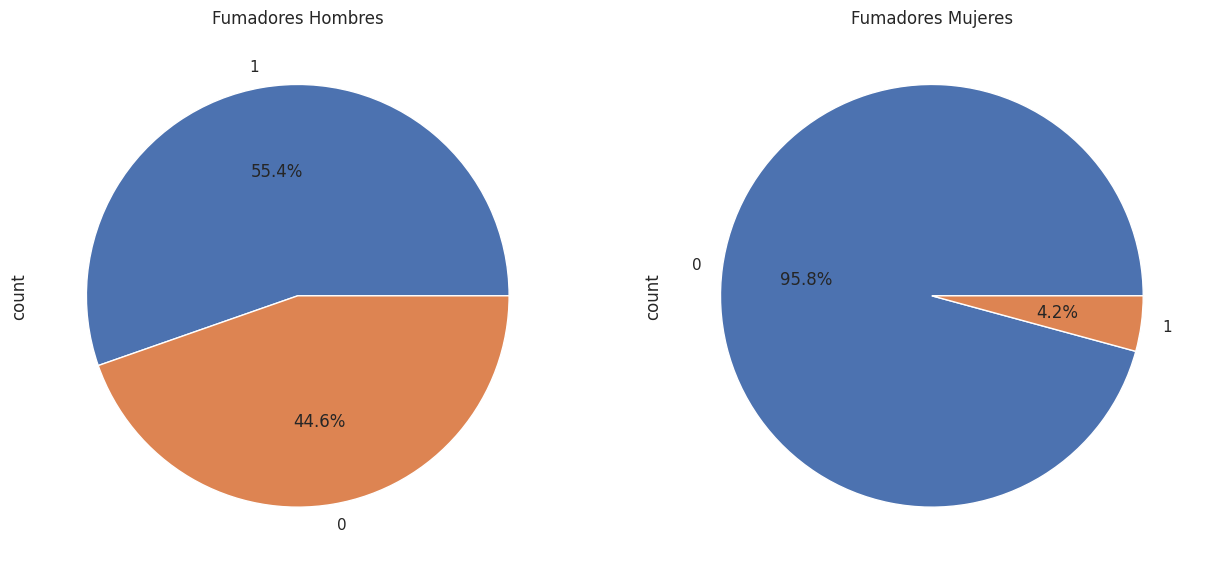

In [134]:
# Visualizando el prorcentaje de fumadores en cada genero
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Fumadores Hombres")
smoking_hombres['smoking'].value_counts().plot.pie(autopct="%1.1f%%");
plt.subplot(1,2,2)
plt.title("Fumadores Mujeres")
smoking_mujeres['smoking'].value_counts().plot.pie(autopct="%1.1f%%");

In [135]:
# Balanceando datos segun clase fumadora en cada genero

# Hombres
# Identificamos la clase mayoritaria
class_counts = smoking_hombres['smoking'].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()


df_majority = smoking_hombres[smoking_hombres['smoking'] == majority_class]
df_minority = smoking_hombres[smoking_hombres['smoking'] == minority_class]
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)
smoking_hombres_balanced = pd.concat([df_majority_downsampled, df_minority])

# Mujeres
# Identificamos la clase mayoritaria
class_counts = smoking_mujeres['smoking'].value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()


df_majority = smoking_mujeres[smoking_mujeres['smoking'] == majority_class]
df_minority = smoking_mujeres[smoking_mujeres['smoking'] == minority_class]
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)
smoking_mujeres_balanced = pd.concat([df_majority_downsampled, df_minority])

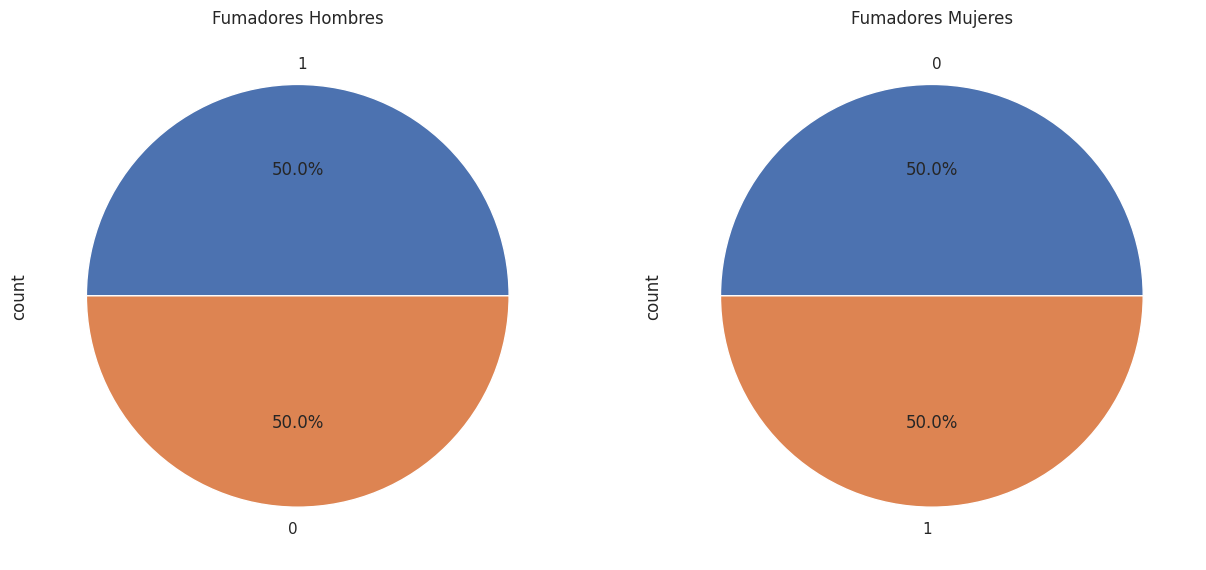

In [136]:
# Visulizando Dataset Balanceada en cada genero
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Fumadores Hombres")
smoking_hombres_balanced['smoking'].value_counts().plot.pie(autopct="%1.1f%%");
plt.subplot(1,2,2)
plt.title("Fumadores Mujeres")
smoking_mujeres_balanced['smoking'].value_counts().plot.pie(autopct="%1.1f%%");

In [137]:
#En la etapa de preparación de los datos crearemos una partición para tener
#un conjunto de datos de entrenamiento y un conjunto de datos de validación.

Xh = smoking_hombres_balanced.drop(columns=['smoking']) # X todo el dataset menos la columna smoking (caracteristicas)
yh = smoking_hombres_balanced['smoking'] # y seran la columna smoking

Xm = smoking_mujeres_balanced.drop(columns=['smoking']) # X todo el dataset menos la columna smoking (caracteristicas)
ym = smoking_mujeres_balanced['smoking'] # y seran la columna smoking

from sklearn.model_selection import train_test_split

# The rest of your code remains the same
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)
X_trainh, X_testh, y_trainh, y_testh = train_test_split(Xh, yh, test_size = 0.20, random_state = 101)
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, test_size = 0.20, random_state = 101)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)
print("HOMBRES")
print(f'Número total de muestras en el dataset: {len(Xh)}')
print("*****"*10)
print(f'Muestras para entrenamiento: {len(X_trainh)}')
print(f'Tamaño de X_train: {X_trainh.shape}')
print("*****"*10)
print(f'Muestras para validación: {len(X_testh)}')
print(f'Tamaño de X_test: {X_testh.shape}')
print("*****"*10)
print("*****"*10)
print("MUJERES")
print(f'Número total de muestras en el dataset: {len(Xm)}')
print("*****"*10)
print(f'Muestras para entrenamiento: {len(X_trainm)}')
print(f'Tamaño de X_train: {X_trainm.shape}')
print("*****"*10)
print(f'Muestras para validación: {len(X_testm)}')
print(f'Tamaño de X_test: {X_testm.shape}')

HOMBRES
Número total de muestras en el dataset: 31610
**************************************************
Muestras para entrenamiento: 25288
Tamaño de X_train: (25288, 19)
**************************************************
Muestras para validación: 6322
Tamaño de X_test: (6322, 19)
**************************************************
**************************************************
MUJERES
Número total de muestras en el dataset: 1718
**************************************************
Muestras para entrenamiento: 1374
Tamaño de X_train: (1374, 19)
**************************************************
Muestras para validación: 344
Tamaño de X_test: (344, 19)


In [138]:
# Ajuste de los datos para que tengan media cero y varianza uno.
#Es decir, alteramos linealmente los datos para que estén escalados entre -1 y 1 de tal
#forma que el entrenamiento de los modelos sea más rápido y mas estable numéricamente.
#Con esto se evitan problemas de explosión de gradientes.
sc=StandardScaler()
X_trainh = sc.fit_transform(X_trainh)
X_testh = sc.transform(X_testh)
X_trainm = sc.fit_transform(X_trainm)
X_testm = sc.transform(X_testm)

### Prueba 4: Clasificacion mediante SVMs

In [139]:
# Hombres

modelh = SVC()
modelh.fit(X_trainh, y_trainh)
predh = modelh.predict(X_testh)

print('HOMBRES')

train_scoreh = modelh.score(X_trainh, y_trainh)
print(f'Train score of trained model: {train_scoreh*100}')

test_scoreh = modelh.score(X_testh, y_testh)
print(f'Test score of trained model: {test_scoreh*100}')

# Mujeres

modelm = SVC()
modelm.fit(X_trainm, y_trainm)
predm = modelm.predict(X_testm)
print('*******'*10)
print('*******'*10)
print('MUJERES')
train_scorem = modelm.score(X_trainm, y_trainm)
print(f'Train score of trained model: {train_scorem*100}')

test_scorem = modelm.score(X_testm, y_testm)
print(f'Test score of trained model: {test_scorem*100}')

HOMBRES
Train score of trained model: 67.07924707371085
Test score of trained model: 63.429294527048405
**********************************************************************
**********************************************************************
MUJERES
Train score of trained model: 76.41921397379913
Test score of trained model: 65.40697674418605


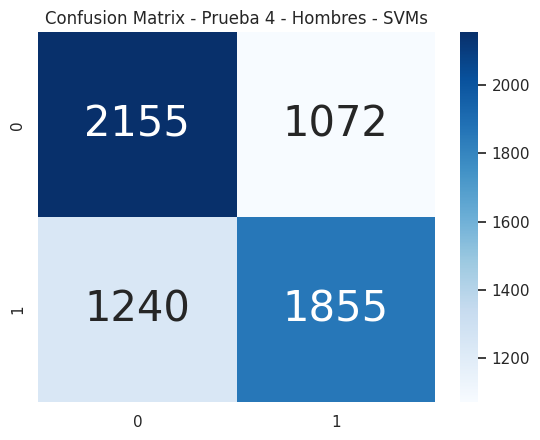

In [140]:
# Midiendo el desempeño de la clasificacion mediante matriz de confusion - Hombres

cm_SVMs = confusion_matrix(y_testh, predh)
ax = plt.axes()
sns.heatmap(cm_SVMs, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 4 - Hombres - SVMs')
plt.show()

In [141]:
# reporte de rendimiento del la clasificacion mediante SVMs en la primera prueba
p4h_svms=classification_report(y_testh, predh, output_dict=True)
print(classification_report(y_testh, predh))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      3227
           1       0.63      0.60      0.62      3095

    accuracy                           0.63      6322
   macro avg       0.63      0.63      0.63      6322
weighted avg       0.63      0.63      0.63      6322



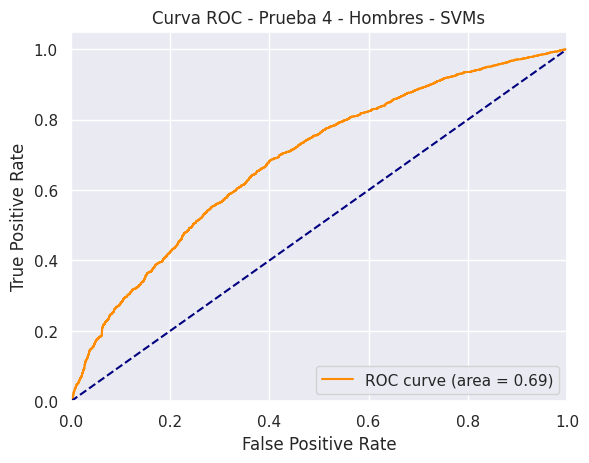

In [142]:
# Curva ROC Prueba 4 - Hombres - SVMs

y_score = modelh.decision_function(X_testh)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_testh, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_testh, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 4 - Hombres - SVMs')
plt.legend(loc="lower right")
plt.show()

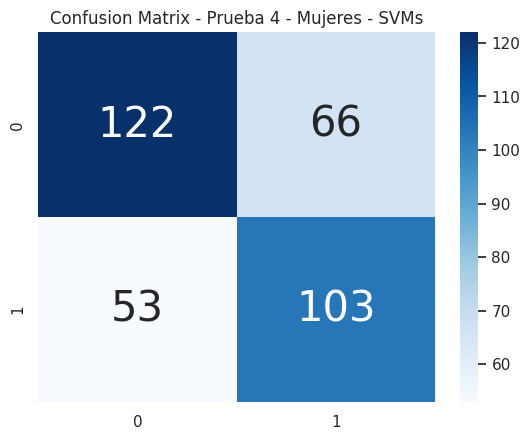

In [143]:
# Midiendo el desempeño de la clasificacion mediante matriz de confusion - Hombres

cm_SVMs = confusion_matrix(y_testm, predm)
ax = plt.axes()
sns.heatmap(cm_SVMs, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 4 - Mujeres - SVMs')
plt.show()

In [144]:
# reporte de rendimiento del la clasificacion mediante SVMs en la primera prueba
p4m_svms=classification_report(y_testm, predm, output_dict=True)
print(classification_report(y_testm, predm))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       188
           1       0.61      0.66      0.63       156

    accuracy                           0.65       344
   macro avg       0.65      0.65      0.65       344
weighted avg       0.66      0.65      0.65       344



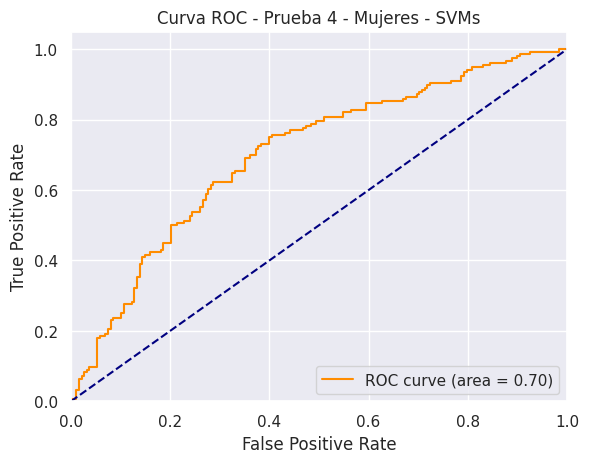

In [145]:
# Curva ROC Prueba 4 - Mujeres - SVMs

y_score = modelm.decision_function(X_testm)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_testm, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_testm, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 4 - Mujeres - SVMs')
plt.legend(loc="lower right")
plt.show()

### PRUEBA 4: Clasificacion mediante Regresión Logística

In [146]:
# Ajustando el modelo Hombres
classifierh = LogisticRegression(solver='lbfgs', multi_class='auto')
classifierh.fit(X_trainh, y_trainh)

# Ajustando el modelo Mujeres
classifierm = LogisticRegression(solver='lbfgs', multi_class='auto')
classifierm.fit(X_trainm, y_trainm)

LogisticRegression()

In [147]:
# prediciendo los resultados Hombres
y_predh = classifierh.predict(X_testh)
probs_yh = classifierh.predict_proba(X_testh) # mirando las probabilidades de las predicciones

# prediciendo los resultados Mujeres
y_predm = classifierm.predict(X_testm)
probs_ym = classifierm.predict_proba(X_testm) # mirando las probabilidades de las predicciones

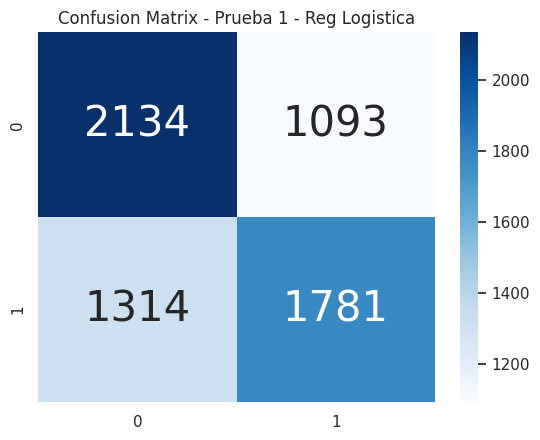

In [148]:
# Evaluando matriz de confusión Hombres
cm = confusion_matrix(y_testh, y_predh)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 1 - Reg Logistica')
plt.show()

In [149]:
# reporte de rendimiento del la clasificacion mediante Regresion logistica en la primera prueba
p4h_reglog=classification_report(y_testh, y_predh, output_dict=True)
print(classification_report(y_testh, y_predh))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      3227
           1       0.62      0.58      0.60      3095

    accuracy                           0.62      6322
   macro avg       0.62      0.62      0.62      6322
weighted avg       0.62      0.62      0.62      6322



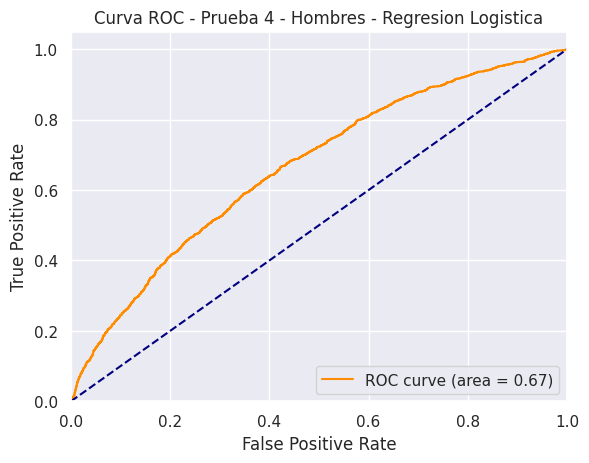

In [150]:
# Curva ROC Prueba 4 - Hombres - Regresion logistica

y_score = classifierh.decision_function(X_testh)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_testh, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_testh, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 4 - Hombres - Regresion Logistica')
plt.legend(loc="lower right")
plt.show()

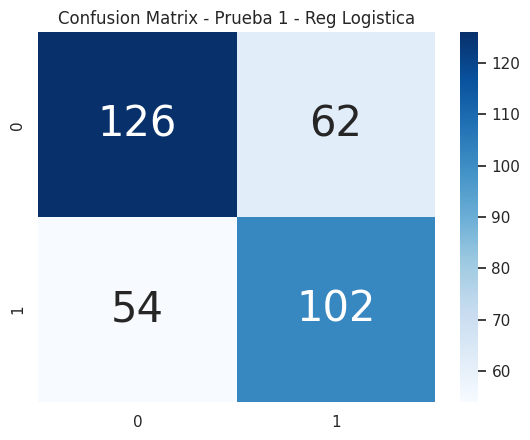

In [151]:
# Evaluando matriz de confusión Mujeres
cm = confusion_matrix(y_testm, y_predm)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix - Prueba 1 - Reg Logistica')
plt.show()

In [152]:
# reporte de rendimiento del la clasificacion mediante Regresion logistica en la primera prueba
p4m_reglog=classification_report(y_testm, y_predm, output_dict=True)
print(classification_report(y_testm, y_predm))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       188
           1       0.62      0.65      0.64       156

    accuracy                           0.66       344
   macro avg       0.66      0.66      0.66       344
weighted avg       0.66      0.66      0.66       344



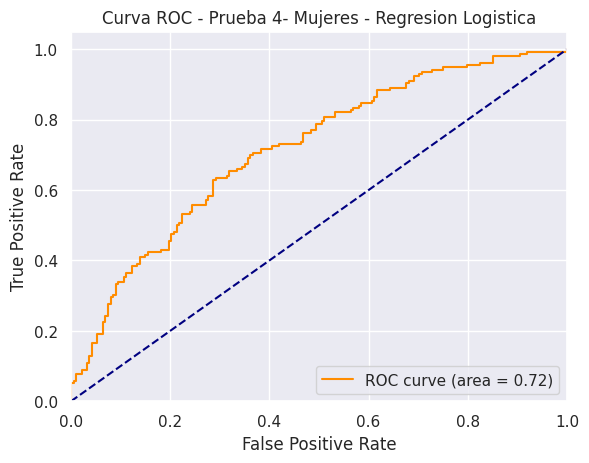

In [153]:
# Curva ROC Prueba 4 - Mujeres - Regresion logistica

y_score = classifierm.decision_function(X_testm)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_testm, y_score)

# Calcular el AUC
roc_auc = roc_auc_score(y_testm, y_score)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Prueba 4- Mujeres - Regresion Logistica')
plt.legend(loc="lower right")
plt.show()

# Resultado Generales

Acontinuacion se muestra una tabla compartiva del reporte de clasificacion (Precisión, Recall, F1-score),teniendo en cuenta la clase fumadora, cada una de las pruebas, algorimo de clasificacion (SVMs, Regresion logistica).

In [154]:
# codigo soportado mediante la ayuda de Gemini con el siguiente prom:
# ayudame a crear una tabla en python donde se visualiza la precision, recall, f1-score, support
# de 0 y 1.  para  varios classification_report

# Creamos una lista de diccionarios para cada clase (0 y 1)
nombre_modelo = ['P1: SVMs','P1: Reg. Logistica', 'P2: Min Corr SVMs', 'P2: Min Corr Reg Log',
                 'P3: Bal (min corr) SVMs', 'P3: Bal (min corr) Reg Log', 'P4: Bal (min corr) H SVMs',
                 'P4: Bal (min corr) H Reg Log', 'P4: Bal (min corr) M SVMs', 'P4: Bal (min corr) M Reg Log']
data = []
i = 0 # initialize an index variable
for report in [p1_svms, p1_reglog, p2_svms, p2_reglog, p3_svms, p3_reglog, p4h_svms, p4h_reglog, p4m_svms, p4m_reglog]:
    for class_label, metrics in report.items():
        if class_label != 'accuracy' and class_label != 'macro avg' and class_label != 'weighted avg':
            data.append({'Modelo': nombre_modelo[i], 'Clase': class_label,
                         'Precisión': metrics['precision'], 'Recall': metrics['recall'],
                         'F1-score': metrics['f1-score'], 'Support': metrics['support']})
    i += 1 # increment index for each report

# Creamos un DataFrame de pandas
df = pd.DataFrame(data)

# Mostramos el DataFrame
print(df)

                          Modelo Clase  Precisión    Recall  F1-score  Support
0                       P1: SVMs     0   0.823088  0.785633  0.803924   6988.0
1                       P1: SVMs     1   0.664802  0.715731  0.689327   4151.0
2             P1: Reg. Logistica     0   0.804484  0.770177  0.786957   6988.0
3             P1: Reg. Logistica     1   0.639020  0.684895  0.661163   4151.0
4              P2: Min Corr SVMs     0   0.819836  0.773612  0.796054   6988.0
5              P2: Min Corr SVMs     1   0.651925  0.713804  0.681463   4151.0
6           P2: Min Corr Reg Log     0   0.802500  0.771608  0.786751   6988.0
7           P2: Min Corr Reg Log     1   0.638914  0.680318  0.658966   4151.0
8        P3: Bal (min corr) SVMs     0   0.912448  0.576618  0.706663   4157.0
9        P3: Bal (min corr) SVMs     1   0.683168  0.942857  0.792276   4025.0
10    P3: Bal (min corr) Reg Log     0   0.884520  0.600674  0.715473   4157.0
11    P3: Bal (min corr) Reg Log     1   0.690241  0

### Visualizacion de resultados generales en diagrama de barras

Para poder facilitar las comparacion entre resultados del reporte de clasificacion vistos en la anterior tabla, se realiza un diagrama de barras para cada una de las clases (Fumadores y no Fumadores).

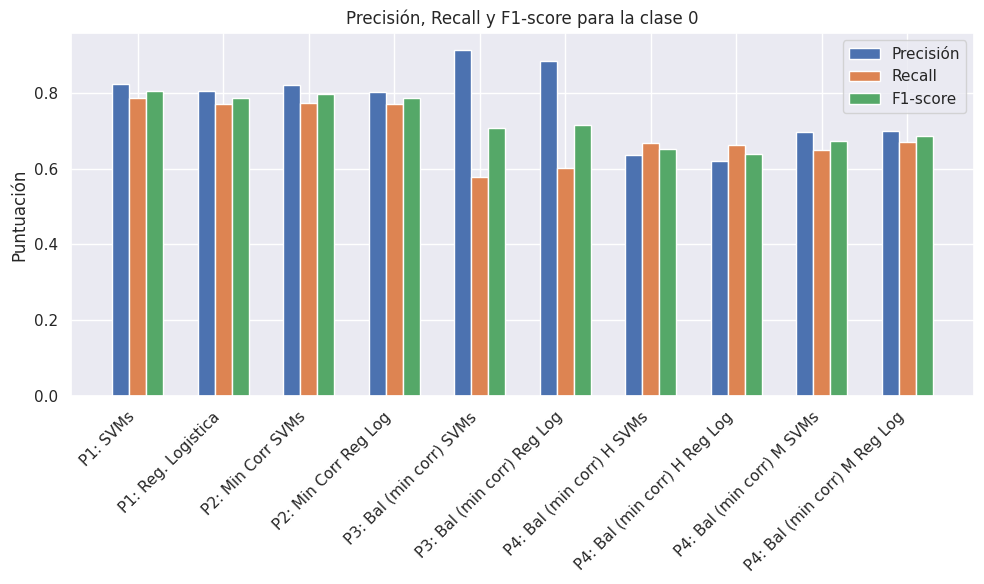

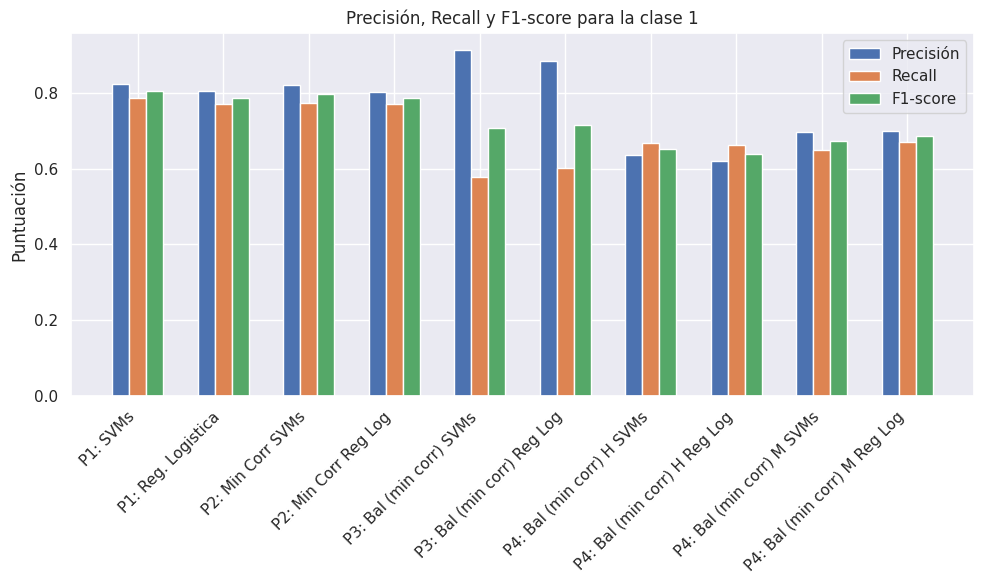

In [155]:



# Extraer la información de la clase 0 del DataFrame
df_clase_0 = df[df['Clase'] == '0']

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar las barras para cada métrica
width = 0.2
x = np.arange(len(df_clase_0['Modelo']))

rects1 = ax.bar(x - width, df_clase_0['Precisión'], width, label='Precisión')
rects2 = ax.bar(x, df_clase_0['Recall'], width, label='Recall')
rects3 = ax.bar(x + width, df_clase_0['F1-score'], width, label='F1-score')

# Configurar etiquetas y título
ax.set_ylabel('Puntuación')
ax.set_title('Precisión, Recall y F1-score para la clase 0')
ax.set_xticks(x)
ax.set_xticklabels(df_clase_0['Modelo'], rotation=45, ha='right')
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()



# Extraer la información de la clase 1 del DataFrame
df_clase_1 = df[df['Clase'] == '1']

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar las barras para cada métrica
width = 0.2
x = np.arange(len(df_clase_1['Modelo']))

rects1 = ax.bar(x - width, df_clase_0['Precisión'], width, label='Precisión')
rects2 = ax.bar(x, df_clase_0['Recall'], width, label='Recall')
rects3 = ax.bar(x + width, df_clase_0['F1-score'], width, label='F1-score')

# Configurar etiquetas y título
ax.set_ylabel('Puntuación')
ax.set_title('Precisión, Recall y F1-score para la clase 1')
ax.set_xticks(x)
ax.set_xticklabels(df_clase_0['Modelo'], rotation=45, ha='right')
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Conclusiones



1.  Mendiante este proyecto se logro apropiar mejor los conocimiento obtenidos en el bootcamp de inteligencia artificial. Tal como el manejo de lenguaje python, teoria y algorimos de clasificacion mediante ML, uso y analisis de indices de rendimiento como la matriz de confusion y reporte de clasificacion (classification_report)
2.   Se observa que el algorimo de SMVs para clasificacion genera mejores en cuanto a presicion pero disminuye en **recall** resultado en comparacion con el algoritmo de regresion logistica tanto en Presicion, recall  y F1-Score. Aunque el algoritmo de Regresion logistica (menos de 1 segundo) se entre bastante mas rapido que el algoritmo SMVs (hasta 4 minutos)
3.   El balancear en numero de datos en el atributo Fumadores (smoking) mejoro la presicion pero **recall** disminuye, lo cual ocaciona una disminucion de **F1-score** de los dos algorimos de clasificacion. Por lo tanto este tratamiendo de los datos no genera una mejora general.
4.   El separar el dataset segun el genero (hombre y mujer) afecto significativamente todos los resultados del reporte de clasificacion para los dos algoritmos de clasificacion.
5.  En general todas las modificacion realizadas a los datos a lo largo de las pruebas 2, 3 y 4, disminuye notoriamente el rendimiento del **F1-Score**, esto demuestra que en clasificacion se tiene mejores resultados al tomar el dataset completo sin modificaciones.







# Referencias



1.  Microsoft Developer, Lista de videos **Machine Learning for Beginners**, 2023. En Linea: *https://www.youtube.com/playlist?list=PLlrxD0HtieHjNnGcZ1TWzPjKYWgfXSiWG*
2.  Microsoft Developer, **Machine Learning for Beginners - A Curriculum**, 2023. En linea: *https://github.com/microsoft/ML-For-Beginners*
3.  Talento tech. Material del **Curso Inteligencia Artificial_Nivel Explorador**, 2024.
4.  Aprende Machine learnig. **Clasificación con datos desbalanceados** 2019. En linea: *https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/*
5. **Gemini**: algunas parte del codigo se utilizo la ayuda de Gemini, se deja registro de los promp utilizados